# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
currentWeatherAPI = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

temperature = []
humidity = []
cloudiness = []
windSpeed = []
lat = []
cityID = []
cityName = []
maxTemp = []
lng = []
country = []

# Build partial query URL
query_url = f"{currentWeatherAPI}appid={weather_api_key}&units={units}&q="
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        windSpeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        cityID.append(response['id'])
        cityName.append(response['name'])
        maxTemp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        print(f"processing record {city}, {response['sys']['country']} ID: {response['id']}")
    else:
        print("skipping city")

processing record hithadhoo, MV ID: 1282256
skipping city
processing record lavrentiya, RU ID: 4031637
processing record kavieng, PG ID: 2094342
processing record cape town, ZA ID: 3369157
processing record souillac, MU ID: 933995
processing record sistranda, NO ID: 3139597
processing record uribia, CO ID: 3666409
processing record chokwe, MZ ID: 1048364
processing record san patricio, MX ID: 3985168
processing record ostersund, SE ID: 2685750
processing record namioka, JP ID: 2129005
processing record victoria, HK ID: 1819729
processing record iquique, CL ID: 3887127
processing record hermanus, ZA ID: 3366880
processing record hobart, AU ID: 2163355
processing record mount gambier, AU ID: 2156643
processing record saskylakh, RU ID: 2017155
processing record gat, IL ID: 293842
processing record vaini, TO ID: 4032243
processing record port alfred, ZA ID: 964432
processing record kapaa, US ID: 5848280
processing record mahebourg, MU ID: 934322
processing record bubaque, GW ID: 2374583
pr

processing record miramar, US ID: 4164601
skipping city
processing record codrington, AU ID: 2171099
skipping city
processing record ochamchira, GE ID: 612652
processing record bambous virieux, MU ID: 1106677
processing record batemans bay, AU ID: 2176639
processing record makarska, HR ID: 3195890
processing record takoradi, GH ID: 2294915
processing record napier, NZ ID: 2186313
processing record isangel, VU ID: 2136825
processing record chake chake, TZ ID: 160677
processing record peniche, PT ID: 2264923
skipping city
processing record abomsa, ET ID: 345704
processing record upernavik, GL ID: 3418910
processing record bereda, ES ID: 3105522
processing record calvinia, ZA ID: 3369174
processing record hami, CN ID: 1529484
processing record cabra, ES ID: 2520645
skipping city
processing record faya, SA ID: 110690
processing record kavaratti, IN ID: 1267390
processing record talnakh, RU ID: 1490256
processing record tura, IN ID: 1254046
processing record edd, ER ID: 338345
processing re

processing record havre-saint-pierre, CA ID: 5972291
processing record nouadhibou, MR ID: 2377457
processing record kolpashevo, RU ID: 1502862
processing record pangnirtung, CA ID: 6096551
processing record huarmey, PE ID: 3939168
processing record matara, LK ID: 1235846
processing record harper, LR ID: 2276492
processing record dicabisagan, PH ID: 1715015
processing record igarka, RU ID: 1505991
processing record dunedin, NZ ID: 2191562
processing record paysandu, UY ID: 3441243
processing record kahului, US ID: 5847411
processing record manta, EC ID: 3654410
processing record geraldton, AU ID: 2070998
processing record abu dhabi, AE ID: 292968
processing record dongsheng, CN ID: 1812256
processing record kostomuksha, RU ID: 543899
processing record salalah, OM ID: 286621
processing record homer, US ID: 5864145
processing record otradnoye, RU ID: 513898
processing record hellin, ES ID: 2516797
processing record meulaboh, ID ID: 1214488
processing record nishihara, JP ID: 1855342
proce

processing record heilbron, ZA ID: 997140
processing record deep river, CA ID: 5937073
processing record sandwick, GB ID: 2638534
processing record bridlington, GB ID: 2654728
processing record crateus, BR ID: 3401548
processing record meadow lake, US ID: 5478673
processing record samarai, PG ID: 2132606
processing record labuhan, ID ID: 8079926
processing record verkhoyansk, RU ID: 2013465
processing record kerchevskiy, RU ID: 551047
processing record novopavlovka, RU ID: 2018896
processing record shieli, KZ ID: 1524801
processing record cape canaveral, US ID: 4149959
processing record talcahuano, CL ID: 3870282


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
cityWeatherDF = pd.DataFrame({'CityID': cityID,
                              'CityName': cityName,
                              'Country': country,
                              'Lat': lat,
                              'Lng': lng,
                              'Temperature': temperature,
                              'MaxTemp': maxTemp,
                              'Humidity': humidity,
                              'Cloudiness': cloudiness,
                              'WindSpeed': windSpeed})
cityWeatherDF.to_csv('city_weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

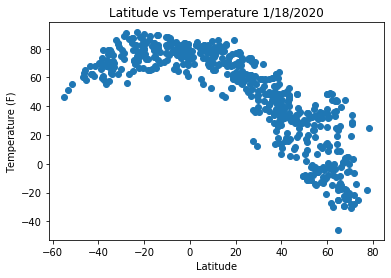

In [32]:
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude vs Temperature 1/18/2020')
plt.show()

#in this graph, we are showing the relationshpi of temperature vs latitude. As expected, it is mostly hyperbolic.

#### Latitude vs. Humidity Plot

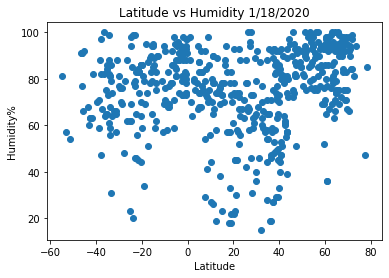

In [33]:
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
plt.title('Latitude vs Humidity 1/18/2020')
plt.show()

#this plot is an attempt to show any patterns between humidity and latitude. While the chart is fairly spersed 
#you can still make out an expected pattern that the more positive or negative you go from the center, the more
#humid it is. You can also see that where you would expectedly get hotter, the humidity drops before shooting back up at center.


#### Latitude vs. Cloudiness Plot

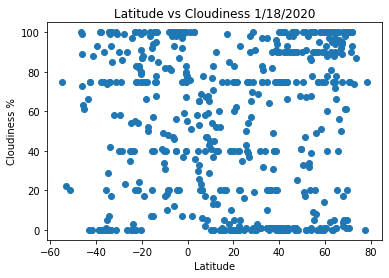

In [34]:
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs Cloudiness 1/18/2020')
plt.show()

#this plot is interesting. I expected there to be a direct corelation of clouds to latitude, as it relates to humitidy.
#this tries to demonstrate that correlation though interesting to note that there are horizontal trends, not vertical.

#### Latitude vs. Wind Speed Plot

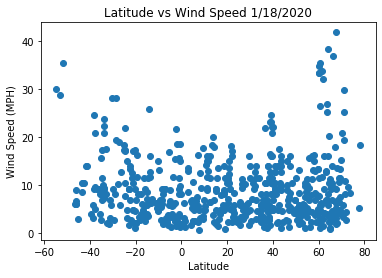

In [35]:
x_values = cityWeatherDF['Lat']
y_values = cityWeatherDF['WindSpeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Latitude vs Wind Speed 1/18/2020')
plt.show()
#this plot attempts to show correlation between wind speed and latitude. There seemingly is none as regardless of latitude,
#the normal is tightly packed with a few outliers.

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [36]:
# Create Northern and Southern Hemisphere DataFrames
northSideDF = cityWeatherDF[cityWeatherDF['Lat'] > 0]
southSideDF = cityWeatherDF[cityWeatherDF['Lat'] < 0]
southSideDF


,CityID,CityName,Country,Lat,Lng,Temperature,MaxTemp,Humidity,Cloudiness,WindSpeed
0,1282256,Hithadhoo,MV,-0.60,73.08,83.12,83.12,73,76,9.80
2,2094342,Kavieng,PG,-2.57,150.80,84.22,84.22,73,75,21.68
3,3369157,Cape Town,ZA,-33.93,18.42,66.13,66.99,56,42,8.01
4,933995,Souillac,MU,-20.52,57.52,80.01,80.01,86,80,1.99
7,1048364,Chokwe,MZ,-24.53,32.98,72.07,72.07,85,97,16.98
...,...,...,...,...,...,...,...,...,...,...
560,997140,Heilbron,ZA,-27.28,27.97,55.89,55.89,79,23,18.88
564,3401548,Crateus,BR,-5.18,-40.68,76.42,76.42,81,100,6.60
566,2132606,Samarai,PG,-10.62,150.67,88.39,88.39,57,49,5.21
567,8079926,Labuhan,ID,-6.88,112.21,77.90,77.90,86,98,3.18


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7224626281180445


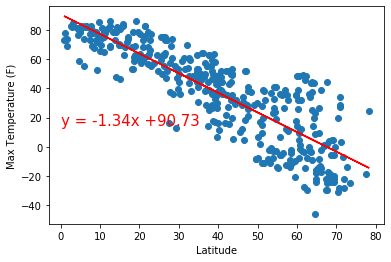

In [37]:
x_values = northSideDF['Lat']
y_values = northSideDF['MaxTemp']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.29x +80.73
The r-squared is: 0.19406015974802043


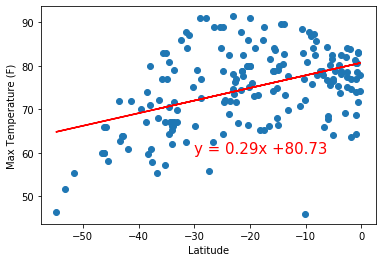

In [38]:
x_values = southSideDF['Lat']
y_values = southSideDF['MaxTemp']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()

In [1]:
#The 2 plots show corelation between the max recorded temperature given latitude. As you can expect,
#the temperature rises the closer to 0 latitude we get, and lowers when we move away.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.35x +60.47
The r-squared is: 0.12946824971056617


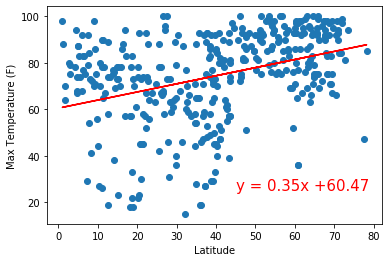

In [39]:
x_values = northSideDF['Lat']
y_values = northSideDF['Humidity']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.31x +83.0
The r-squared is: 0.07972559304080089


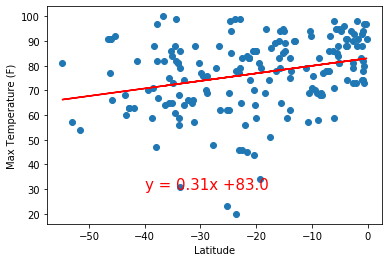

In [40]:
x_values = southSideDF['Lat']
y_values = southSideDF['Humidity']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()

In [ ]:
#these plots attempt to show correlation between humidity and latitude one for nothern and one for southern hemisphere.
# there is very minimal correlation, but on both north and southern plots, we can see a hyperbolic dip in temperatures
# in the 10-40 bands respectively. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.56x +27.02
The r-squared is: 0.08325355537104707


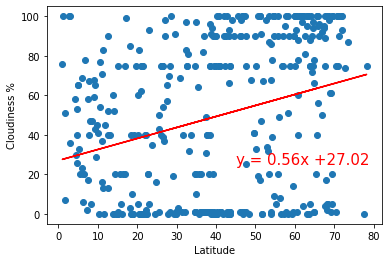

In [41]:
x_values = northSideDF['Lat']
y_values = northSideDF['Cloudiness']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.44x +70.67
The r-squared is: 0.03142512597600801


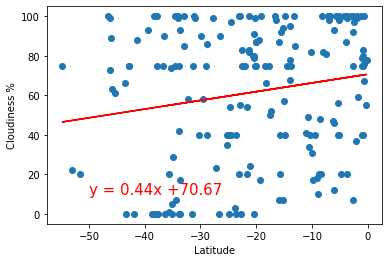

In [42]:
x_values = southSideDF['Lat']
y_values = southSideDF['Cloudiness']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()

In [ ]:
#This attempts to show any differences or similarities between the north and south in relations to cloudiness. As with the
#overall plot, there seems to be a lack of trends in regard to latitude, but definitely some trend lines in regards to
# the amount of cloudiness points at specicific %s regardless of the latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.06x +6.42
The r-squared is: 0.03132450021147478


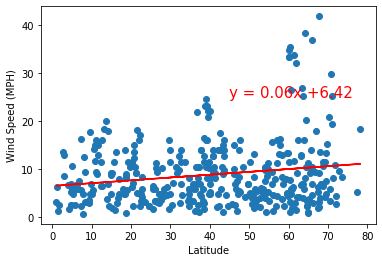

In [43]:
x_values = northSideDF['Lat']
y_values = northSideDF['WindSpeed']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.annotate(line_eq,(45,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.15x +5.87
The r-squared is: 0.10138243591543337


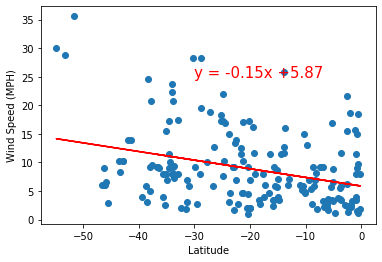

In [44]:
x_values = southSideDF['Lat']
y_values = southSideDF['WindSpeed']

# Perform a linear regression on Max Temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()

In [2]:
#northern and southern hemisphere both seem to have a lot of data bunched in the same wind speed range. This to me would be
#expected as human life and wildlife would likely have issues living in habitats of high wind speeds. There are a couple outliers
#likely in cities more costal or devoid of major life, they would be the outliers.